In [1]:
import torch
from torch import nn, optim
import torch_directml
import torchvision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)
if torch_directml.is_available():
    device = torch_directml.device()
else:
    device = torch.device("cpu")
print(device)



Matplotlib is building the font cache; this may take a moment.


2.4.1+cpu
0.19.1+cpu
privateuseone:0


In [ ]:
def train_vs_test_loss(train_losses, test_losses, epochs):
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Test Loss')
    plt.legend()
    plt.show()

In [ ]:
w = 0.7
b = 0.3
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = w * x + b
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

In [ ]:
x_test, y_test, x_train, y_train

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
        

In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})

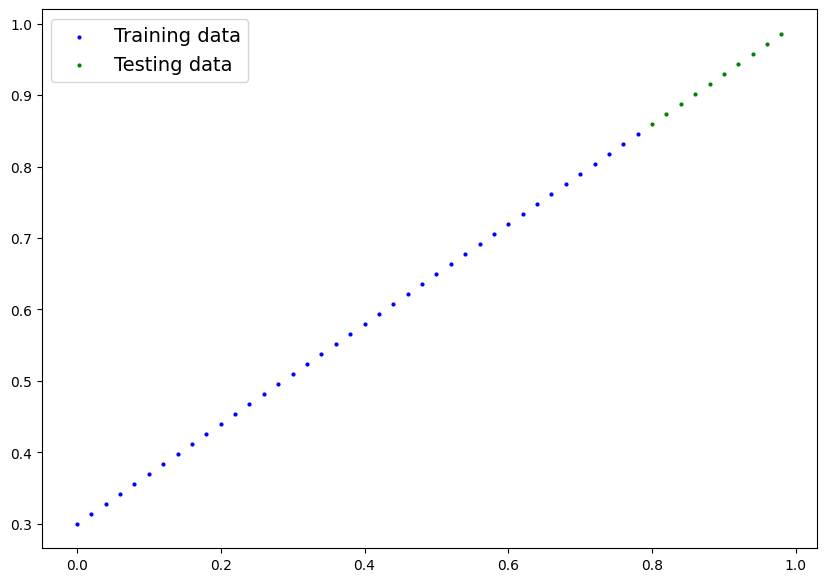

In [ ]:
plot_predictions(x_train, y_train, x_test, y_test)

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.w * x + self.b

In [ ]:
torch.manual_seed(42)
model = LinearRegressionModel()

with torch.inference_mode():
    y_preds = model(x_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

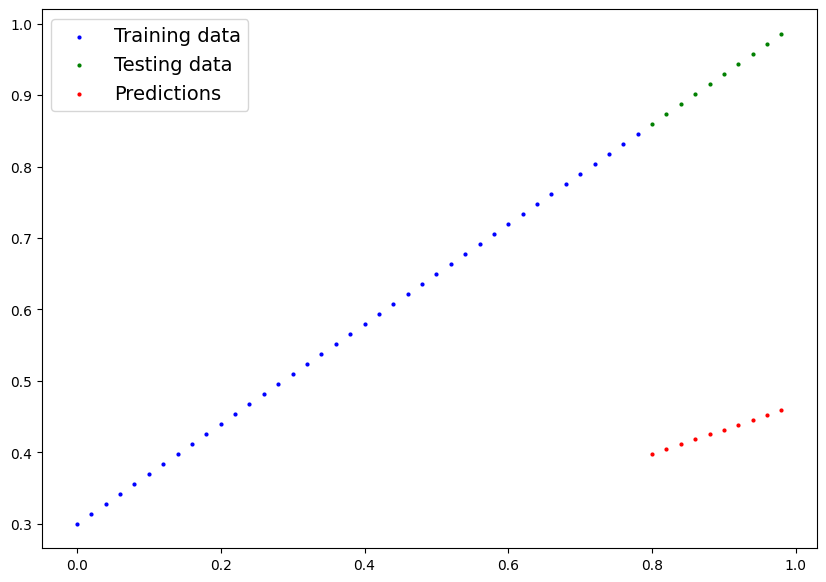

In [ ]:
plot_predictions(predictions= y_preds)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
EPOCHS = 100
train_losses = []
test_losses = []
for epoch in range(EPOCHS):
    # Training
    model.train()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Testing (every 10 epochs)
    if epoch % 10 == 0:
        model.eval()
        with torch.inference_mode():
            y_test_pred = model(x_test)
            test_loss = loss_fn(y_test_pred, y_test)
            test_losses.append(test_loss.item())
            
        print(f"Epoch: {epoch:3d} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f} | W: {model.w.item():.4f} | B: {model.b.item():.4f}")

with torch.inference_mode():
    y_preds = model(x_test)
    test_loss = loss_fn(y_preds, y_test)
    print(f"Test loss: {test_loss}")


Epoch:   0 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch:  10 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch:  20 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch:  30 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch:  40 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch:  50 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch:  60 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch:  70 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch:  80 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch:  90 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch: 100 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch: 110 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch: 120 | Train Loss: 0.0026 | Test Loss: 0.0084 | W: 0.6990 | B: 0.3093
Epoch: 130 |

In [ ]:
model.eval()
with torch.inference_mode():
    y_preds = model(x_test)
    final_test_loss = loss_fn(y_preds, y_test)
    print(f"\nFinal Test Loss: {final_test_loss:.4f}")
    print(f"Target: W={w}, B={b}")
    print(f"Learned: W={model.w.item():.4f}, B={model.b.item():.4f}")


Final Test Loss: 0.0050
Target: W=0.7, B=0.3
Learned: W=0.6951, B=0.2993


In [ ]:
train_vs_test_loss(train_losses, test_losses, epochs=EPOCHS)

NameError: name 'train_losses' is not defined